In [23]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from time import time
from loguru import logger

%matplotlib inline

In [38]:
im1 =  cv2.imread("inference/images/seq01-img-left/image_00000088_0.png");
im2 =  cv2.imread("inference/images/seq01-img-left/image_00000089_0.png");

sz = im1.shape

warp_mode = cv2.MOTION_HOMOGRAPHY
warp_matrix = np.eye(3, 3, dtype=np.float32)
number_of_iterations = 500
termination_eps = 1e-5

sift = cv2.SIFT_create()

criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)

t1 = time()
im1_gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
im2_gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
t2 = time()
(cc, warp_matrix) = cv2.findTransformECC(im1_gray,im2_gray,warp_matrix, warp_mode, criteria, inputMask=None, gaussFiltSize=1)
t3 = time()
kp1, des1 = sift.detectAndCompute(im1_gray,None)
kp2, des2 = sift.detectAndCompute(im2_gray,None)
t4 = time()

logger.info(f"Time to convert to gray: {t2-t1} ms")
logger.info(f"Time to find transform: {t3-t2} ms")

2023-04-07 16:55:29.844 | INFO     | __main__:<module>:20 - Time to convert to gray: 0.0009982585906982422 ms
2023-04-07 16:55:29.845 | INFO     | __main__:<module>:21 - Time to find transform: 0.34058618545532227 ms


In [39]:
im2_aligned = cv2.warpPerspective(im2, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)

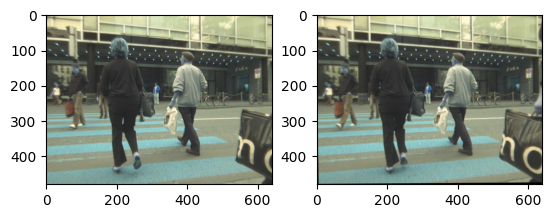

In [40]:
plt.subplot(1, 2, 1)
plt.imshow(im1)
plt.subplot(1, 2, 2)
plt.imshow(im2_aligned)